<a href="https://colab.research.google.com/github/bernatm/ABDataChallengeExtension/blob/main/ShapValues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import data

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
from scipy.stats import shapiro

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/TFG/Data AB/all_zone_data.csv")
data = data.rename(columns={'Unnamed: 0': 'FECHA'})
data['FECHA'] = pd.to_datetime(data['FECHA'])
data.set_index('FECHA', inplace=True)

data.head()

,ZONA,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND
FECHA,,,,,,,,
2019-01-01,TORRELLES LLOBREGAT,79.533113,0.0,1.0,1.0,2019.0,1.0,0.0
2019-01-02,TORRELLES LLOBREGAT,88.636301,0.0,2.0,1.0,2019.0,2.0,0.0
2019-01-03,TORRELLES LLOBREGAT,87.678071,0.0,3.0,1.0,2019.0,3.0,0.0
2019-01-04,TORRELLES LLOBREGAT,85.522052,0.0,4.0,1.0,2019.0,4.0,0.0
2019-01-05,TORRELLES LLOBREGAT,87.678071,0.0,5.0,1.0,2019.0,5.0,1.0


## Join meteo data

In [ ]:
meteo_data = pd.read_csv("/content/drive/MyDrive/TFG/Data AB/meteo_data.csv")
meteo_data['DATA_LECTURA'] = pd.to_datetime(meteo_data['DATA_LECTURA'])
meteo_data = meteo_data[meteo_data['DATA_LECTURA'].dt.hour == 12]
meteo_data = meteo_data[meteo_data['DATA_LECTURA'].dt.minute == 0]
meteo_data.head(20)

,ID,CODI_ESTACIO,CODI_VARIABLE,DATA_LECTURA,DATA_EXTREM,VALOR_LECTURA,CODI_ESTAT,CODI_BASE
0,WE320101191200,WE,32,2019-01-01 12:00:00,NaN,10.6,V,SH
1,WE350101191200,WE,35,2019-01-01 12:00:00,NaN,0.0,V,SH
2,WE330101191200,WE,33,2019-01-01 12:00:00,NaN,74.0,V,SH
3,XL350101191200,XL,35,2019-01-01 12:00:00,NaN,0.0,V,SH
4,XL320101191200,XL,32,2019-01-01 12:00:00,NaN,15.7,V,SH
5,XL330101191200,XL,33,2019-01-01 12:00:00,NaN,55.0,V,SH
6,XL360101191200,XL,36,2019-01-01 12:00:00,NaN,437.0,V,SH
7,XV320101191200,XV,32,2019-01-01 12:00:00,NaN,13.7,V,SH
8,XV330101191200,XV,33,2019-01-01 12:00:00,NaN,57.0,V,SH
9,XV360101191200,XV,36,2019-01-01 12:00:00,NaN,429.0,V,SH


In [ ]:
# Drop unwanted columns
meteo_data = meteo_data.drop(['ID', 'DATA_EXTREM', 'CODI_ESTAT', 'CODI_BASE'], axis=1)

# Convert DATA_LECTURA to datetime and ignore the hour
meteo_data['DATA_LECTURA'] = pd.to_datetime(meteo_data['DATA_LECTURA']).dt.date
meteo_data.head(30)

,CODI_ESTACIO,CODI_VARIABLE,DATA_LECTURA,VALOR_LECTURA
0,WE,32,2019-01-01,10.6
1,WE,35,2019-01-01,0.0
2,WE,33,2019-01-01,74.0
3,XL,35,2019-01-01,0.0
4,XL,32,2019-01-01,15.7
5,XL,33,2019-01-01,55.0
6,XL,36,2019-01-01,437.0
7,XV,32,2019-01-01,13.7
8,XV,33,2019-01-01,57.0
9,XV,36,2019-01-01,429.0


In [ ]:
# Create new columns TEMP, HR, PPT, and RS
meteo_data['TEMP'] = np.where(meteo_data['CODI_VARIABLE'] == 32, meteo_data['VALOR_LECTURA'],np.nan)
meteo_data['HR'] = np.where(meteo_data['CODI_VARIABLE'] == 33, meteo_data['VALOR_LECTURA'], np.nan)
meteo_data['PPT'] = np.where(meteo_data['CODI_VARIABLE'] == 35, meteo_data['VALOR_LECTURA'], np.nan)
meteo_data['RS'] = np.where(meteo_data['CODI_VARIABLE'] == 36, meteo_data['VALOR_LECTURA'], np.nan)

# Group the dataframe by CODI_ESTACIO and DATA_LECTURA
grouped = meteo_data.groupby(['CODI_ESTACIO', 'DATA_LECTURA'])

# Define a lambda function to combine the non-null values for each column
combine_func = lambda x: x.dropna().iloc[0] if not x.isnull().all() else np.nan

# Apply the aggregation function to each group
meteo_data = grouped.agg(combine_func)

meteo_data.reset_index(inplace=True)
meteo_data.set_index('DATA_LECTURA', inplace=True)
meteo_data




,CODI_ESTACIO,CODI_VARIABLE,VALOR_LECTURA,TEMP,HR,PPT,RS
DATA_LECTURA,,,,,,,
2019-01-01,WE,32,10.6,10.6,74.0,0.0,NaN
2019-01-02,WE,33,57.0,14.8,57.0,0.0,NaN
2019-01-03,WE,32,15.4,15.4,67.0,0.0,NaN
2019-01-04,WE,32,18.3,18.3,35.0,0.0,NaN
2019-01-05,WE,32,20.9,20.9,53.0,0.0,NaN
...,...,...,...,...,...,...,...
2021-12-28,XV,32,17.8,17.8,50.0,0.0,370.0
2021-12-29,XV,32,16.8,16.8,57.0,0.0,295.0
2021-12-30,XV,32,17.2,17.2,59.0,0.0,405.0


In [ ]:
# Create boolean masks for each value of CODI_ESTACIO
mask_WE = meteo_data['CODI_ESTACIO'] == 'WE'
mask_XL = meteo_data['CODI_ESTACIO'] == 'XL'
mask_XV = meteo_data['CODI_ESTACIO'] == 'XV'
mask_X4 = meteo_data['CODI_ESTACIO'] == 'X4'

# Create subdataframes using boolean indexing
meteo_data_WE = meteo_data[mask_WE]
meteo_data_XL = meteo_data[mask_XL]
meteo_data_XV = meteo_data[mask_XV]
meteo_data_X4 = meteo_data[mask_X4]

meteo_data_WE = meteo_data_WE.drop(['CODI_ESTACIO', 'CODI_VARIABLE', 'VALOR_LECTURA'], axis=1)
meteo_data_XL = meteo_data_XL.drop(['CODI_ESTACIO','CODI_VARIABLE','VALOR_LECTURA'],axis=1)
meteo_data_XV = meteo_data_XV.drop(['CODI_ESTACIO', 'CODI_VARIABLE','VALOR_LECTURA'],axis=1)
meteo_data_X4 = meteo_data_X4.drop(['CODI_ESTACIO', 'CODI_VARIABLE','VALOR_LECTURA'], axis=1)


meteo_data_XL

,TEMP,HR,PPT,RS
DATA_LECTURA,,,,
2019-01-01,15.7,55.0,0.0,437.0
2019-01-02,14.8,68.0,0.0,409.0
2019-01-03,17.3,65.0,0.0,667.0
2019-01-04,19.5,43.0,0.0,848.0
2019-01-05,20.2,61.0,0.0,957.0
...,...,...,...,...
2021-12-28,19.8,45.0,0.0,322.0
2021-12-29,18.6,52.0,0.0,188.0
2021-12-30,19.2,53.0,0.0,449.0


In [ ]:
# Fill NaN values in RS column of meteo_data_WE with values from meteo_data_XL
meteo_data_WE['RS'].fillna(meteo_data_XL['RS'], inplace=True)
meteo_data_WE


,TEMP,HR,PPT,RS
DATA_LECTURA,,,,
2019-01-01,10.6,74.0,0.0,437.0
2019-01-02,14.8,57.0,0.0,409.0
2019-01-03,15.4,67.0,0.0,667.0
2019-01-04,18.3,35.0,0.0,848.0
2019-01-05,20.9,53.0,0.0,957.0
...,...,...,...,...
2021-12-28,17.2,56.0,0.0,322.0
2021-12-29,17.4,60.0,0.0,188.0
2021-12-30,16.8,68.0,0.0,449.0


In [ ]:
print("NaN values in meteo_data_WE:")
print(meteo_data_WE.isnull().sum())

print("NaN values in meteo_data_XL:")
print(meteo_data_XL.isnull().sum())

print("NaN values in meteo_data_XV:")
print(meteo_data_XV.isnull().sum())

print("NaN values in meteo_data_SH:")
print(meteo_data_X4.isnull().sum())


NaN values in meteo_data_WE:
TEMP    0
HR      0
PPT     0
RS      0
dtype: int64
NaN values in meteo_data_XL:
TEMP    0
HR      0
PPT     0
RS      0
dtype: int64
NaN values in meteo_data_XV:
TEMP    0
HR      0
PPT     0
RS      0
dtype: int64
NaN values in meteo_data_SH:
TEMP    0
HR      0
PPT     0
RS      0
dtype: int64


In [ ]:
#X4 Barcelona XL El Prat XV Sant Cugat WE Vilanova del Valles# Create a dictionary to store the split dataframes
data_dict = {}

# Define the conditions for each dataset
conditions = [
    data['ZONA'].isin(['BARCELONA', 'SANT ADRIA', "L'HOSPITALET LLOBR.", 'SANT JUST DESVERN', 'ESPLUGUES']),
    data['ZONA'].isin(['EL PRAT', 'GAVA', 'CORNELLA', 'BEGUES', 'CASTELLDEFELS', 'SANT BOI', 'TORRELLES LLOBREGAT', 'VILADECANS', 'SANT JOAN DESPI', 'STA.COLOMA GRAMENET', 'SANT CLIMENT LLOB.', 'SANT FELIU LL.', 'LES BOTIGUES SITGES', 'STA.COLOMA CERVELLO', 'MONTCADA I REIXAC']),
    data['ZONA'].isin(['SANT CUGAT', 'PALLEJA', 'CERDANYOLA', 'EL PAPIOL', 'BADIA', 'SABADELL', 'RIPOLLET']),
    data['ZONA'].isin(['BADALONA', 'MONTGAT', 'LA LLAGOSTA', 'TIANA'])
]

# Define the names for each dataset
names = ['all_zone_data_X4', 'all_zone_data_XL', 'all_zone_data_XV', 'all_zone_data_WE']

# Split the dataframe based on the conditions and assign each subset to a dictionary key
for i in range(len(names)):
    data_dict[names[i]] = data.loc[conditions[i]]

df_X4 = data_dict['all_zone_data_X4']
df_XL = data_dict['all_zone_data_XL']
df_XV = data_dict['all_zone_data_XV']
df_WE = data_dict['all_zone_data_WE']
df_WE

,ZONA,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND
FECHA,,,,,,,,
2019-01-01,MONTGAT,50.435198,0.0,1.0,1.0,2019.0,1.0,0.0
2019-01-02,MONTGAT,46.453472,0.0,2.0,1.0,2019.0,2.0,0.0
2019-01-03,MONTGAT,59.194996,0.0,3.0,1.0,2019.0,3.0,0.0
2019-01-04,MONTGAT,53.355131,0.0,4.0,1.0,2019.0,4.0,0.0
2019-01-05,MONTGAT,56.275063,0.0,5.0,1.0,2019.0,5.0,1.0
...,...,...,...,...,...,...,...,...
2021-12-28,BADALONA,91.874718,1.0,28.0,12.0,2021.0,1.0,0.0
2021-12-29,BADALONA,91.874785,1.0,29.0,12.0,2021.0,2.0,0.0
2021-12-30,BADALONA,91.874752,1.0,30.0,12.0,2021.0,3.0,0.0


In [ ]:
df_X4 = df_X4.join(meteo_data_X4, how='left')
df_XL = df_XL.join(meteo_data_XL, how='left')
df_XV = df_XV.join(meteo_data_XV, how='left')
df_WE = df_WE.join(meteo_data_WE, how='left')

data = pd.concat([df_X4, df_XL, df_XV])

In [ ]:
data

,ZONA,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND,TEMP,HR,PPT,RS
2019-01-01,L'HOSPITALET LLOBR.,63.178257,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0
2019-01-01,ESPLUGUES,72.047305,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0
2019-01-01,SANT ADRIA,46.219216,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0
2019-01-01,SANT JUST DESVERN,111.552993,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0
2019-01-01,BARCELONA,160.476330,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,EL PAPIOL,144.042968,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0
2022-01-01,BADIA,0.537744,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0
2022-01-01,SABADELL,56.139615,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0
2022-01-01,RIPOLLET,102.187807,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0


## Temporal Data

In [ ]:
from dateutil import relativedelta

# Add a column indicating the season based on the datetime index
data['SEASON'] = data.index.to_series().apply(lambda x: (x.month % 12 + 3) // 3)

# The season values will be as follows:
# 1 - Winter
# 2 - Spring
# 3 - Summer
# 4 - Autumn

In [ ]:
data

,ZONA,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND,TEMP,HR,PPT,RS,SEASON
2019-01-01,L'HOSPITALET LLOBR.,63.178257,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1
2019-01-01,ESPLUGUES,72.047305,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1
2019-01-01,SANT ADRIA,46.219216,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1
2019-01-01,SANT JUST DESVERN,111.552993,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1
2019-01-01,BARCELONA,160.476330,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,EL PAPIOL,144.042968,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0,1
2022-01-01,BADIA,0.537744,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0,1
2022-01-01,SABADELL,56.139615,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0,1
2022-01-01,RIPOLLET,102.187807,1.0,1.0,1.0,2022.0,5.0,1.0,18.2,37.0,0.0,446.0,1


In [ ]:
data = data.dropna()

## Demographic and Socioeconomical Data

In [ ]:
dades_municipi = pd.read_csv("/content/drive/MyDrive/TFG/dades_municipi.csv")
dades_municipi

,Municipi,Consum_persona_dia,Poblacio,Densitat,Renta
0,SANT BOI,103.44,84500,3935.7,35370
1,TORRELLES LLOBREGAT,134.95,5945,456.2,44812
2,BADALONA,102.36,223166,10552.7,33689
3,GAVA,120.62,47057,1527.6,39233
4,CORNELLA,99.25,89936,12738.0,33806
5,VILADECANS,105.65,67197,3270.6,37205
6,BEGUES,137.02,6961,147.7,53813
7,L'HOSPITALET LLOBR.,96.75,269382,21406.8,31358
8,ESPLUGUES,107.80,47150,10090.0,41369
9,PALLEJA,124.83,11486,1396.8,43388


In [ ]:
data = data.merge(dades_municipi, left_on='ZONA', right_on='Municipi')
data = data.drop('Municipi', axis=1)


In [ ]:
data = data.rename(columns={'Poblacio': 'POBLACIO', 'Densitat': 'DENSITAT', 'Renta': 'RENTA'})

data

,ZONA,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND,TEMP,HR,PPT,RS,SEASON,Consum_persona_dia,POBLACIO,DENSITAT,RENTA
0,L'HOSPITALET LLOBR.,63.178257,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1,96.75,269382,21406.8,31358
1,L'HOSPITALET LLOBR.,76.389796,0.0,2.0,1.0,2019.0,2.0,0.0,14.7,63.0,0.0,424.0,1,96.75,269382,21406.8,31358
2,L'HOSPITALET LLOBR.,74.187873,0.0,3.0,1.0,2019.0,3.0,0.0,15.3,69.0,0.0,714.0,1,96.75,269382,21406.8,31358
3,L'HOSPITALET LLOBR.,72.832843,0.0,4.0,1.0,2019.0,4.0,0.0,16.6,43.0,0.0,750.0,1,96.75,269382,21406.8,31358
4,L'HOSPITALET LLOBR.,63.686393,0.0,5.0,1.0,2019.0,5.0,1.0,20.2,47.0,0.0,945.0,1,96.75,269382,21406.8,31358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28189,CERDANYOLA,138.652285,1.0,28.0,12.0,2021.0,1.0,0.0,17.8,50.0,0.0,370.0,1,116.75,57855,1874.7,41078
28190,CERDANYOLA,138.652344,1.0,29.0,12.0,2021.0,2.0,0.0,16.8,57.0,0.0,295.0,1,116.75,57855,1874.7,41078
28191,CERDANYOLA,138.652315,1.0,30.0,12.0,2021.0,3.0,0.0,17.2,59.0,0.0,405.0,1,116.75,57855,1874.7,41078
28192,CERDANYOLA,138.652330,1.0,31.0,12.0,2021.0,4.0,0.0,15.3,56.0,0.0,401.0,1,116.75,57855,1874.7,41078


## Shap Values

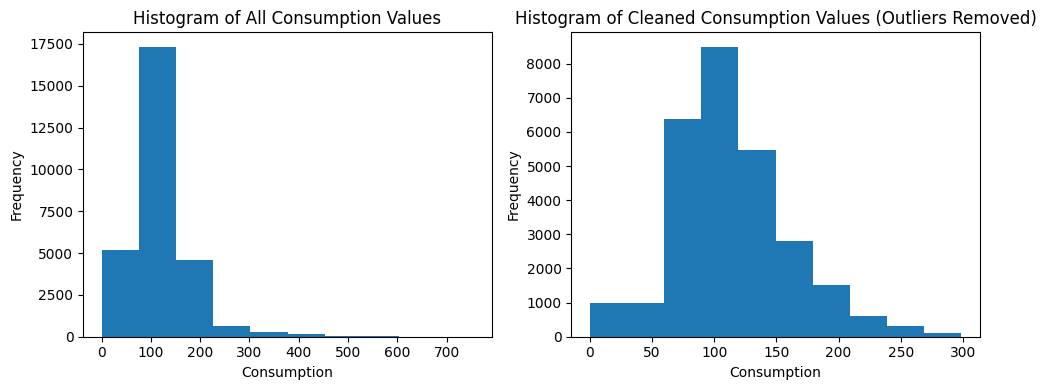

In [ ]:
# Calculate the Z-scores for consumption values
z_scores = (data['CONSUM'] - data['CONSUM'].mean()) / data['CONSUM'].std()

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Remove outliers from the DataFrame
all_zone_data_cleaned = data.drop(np.array(outlier_indices))

# Plot histogram of all consumption values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['CONSUM'], bins=10)
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of All Consumption Values')

# Plot histogram of cleaned consumption values
plt.subplot(1, 2, 2)
plt.hist(all_zone_data_cleaned['CONSUM'], bins=10)
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Cleaned Consumption Values (Outliers Removed)')

plt.tight_layout()
plt.show()
data = all_zone_data_cleaned

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
data

,ZONA,CONSUM,Estimated,DAY,MONTH,YEAR,WEEKDAY_NUM,IS_WEEKEND,TEMP,HR,PPT,RS,SEASON,Consum_persona_dia,POBLACIO,DENSITAT,RENTA
0,L'HOSPITALET LLOBR.,63.178257,0.0,1.0,1.0,2019.0,1.0,0.0,15.5,68.0,0.0,405.0,1,96.75,269382,21406.8,31358
1,L'HOSPITALET LLOBR.,76.389796,0.0,2.0,1.0,2019.0,2.0,0.0,14.7,63.0,0.0,424.0,1,96.75,269382,21406.8,31358
2,L'HOSPITALET LLOBR.,74.187873,0.0,3.0,1.0,2019.0,3.0,0.0,15.3,69.0,0.0,714.0,1,96.75,269382,21406.8,31358
3,L'HOSPITALET LLOBR.,72.832843,0.0,4.0,1.0,2019.0,4.0,0.0,16.6,43.0,0.0,750.0,1,96.75,269382,21406.8,31358
4,L'HOSPITALET LLOBR.,63.686393,0.0,5.0,1.0,2019.0,5.0,1.0,20.2,47.0,0.0,945.0,1,96.75,269382,21406.8,31358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28189,CERDANYOLA,138.652285,1.0,28.0,12.0,2021.0,1.0,0.0,17.8,50.0,0.0,370.0,1,116.75,57855,1874.7,41078
28190,CERDANYOLA,138.652344,1.0,29.0,12.0,2021.0,2.0,0.0,16.8,57.0,0.0,295.0,1,116.75,57855,1874.7,41078
28191,CERDANYOLA,138.652315,1.0,30.0,12.0,2021.0,3.0,0.0,17.2,59.0,0.0,405.0,1,116.75,57855,1874.7,41078
28192,CERDANYOLA,138.652330,1.0,31.0,12.0,2021.0,4.0,0.0,15.3,56.0,0.0,401.0,1,116.75,57855,1874.7,41078


In [ ]:
import shap
from sklearn.linear_model import LinearRegression

# Select the input features and target variable
X = data[['WEEKDAY_NUM', 'TEMP', 'HR', 'PPT', 'RS', 'SEASON', 'POBLACIO', 'DENSITAT', 'RENTA']]

# Rename the columns
X = X.rename(columns={'POBLACIO': 'POPULATION', 'DENSITAT': 'POP_DENSITY', 'RENTA': 'INCOME'})

y = data['CONSUM']


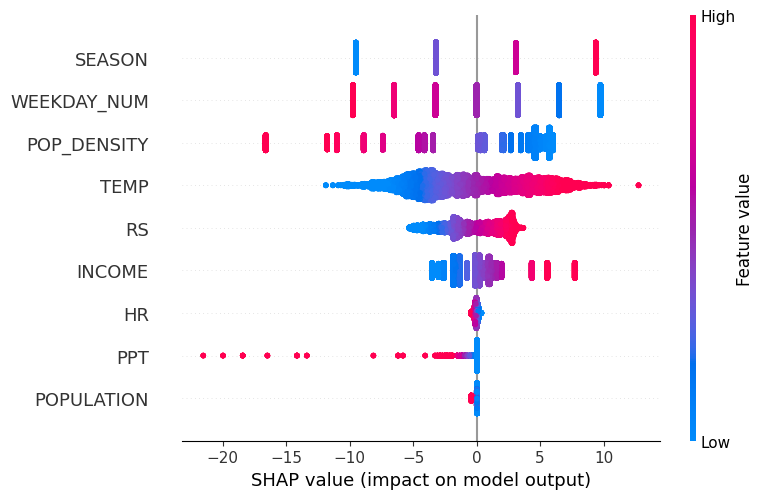

In [ ]:
# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Initialize the SHAP explainer with the trained model
explainer = shap.Explainer(model, X)

# Calculate SHAP values
shap_values = explainer(X)

# Plot the SHAP values
shap.summary_plot(shap_values, X)




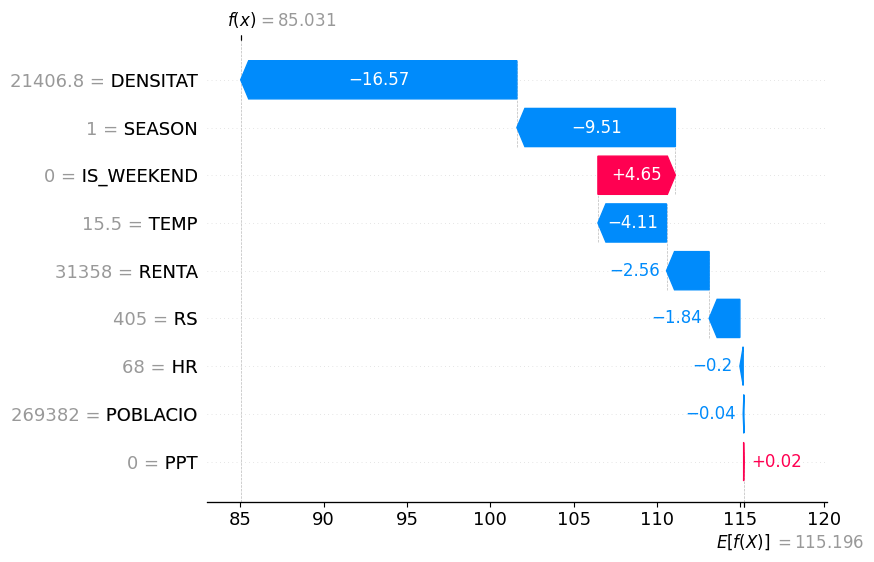

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values[0].values, X.iloc[0], link = 'logit')

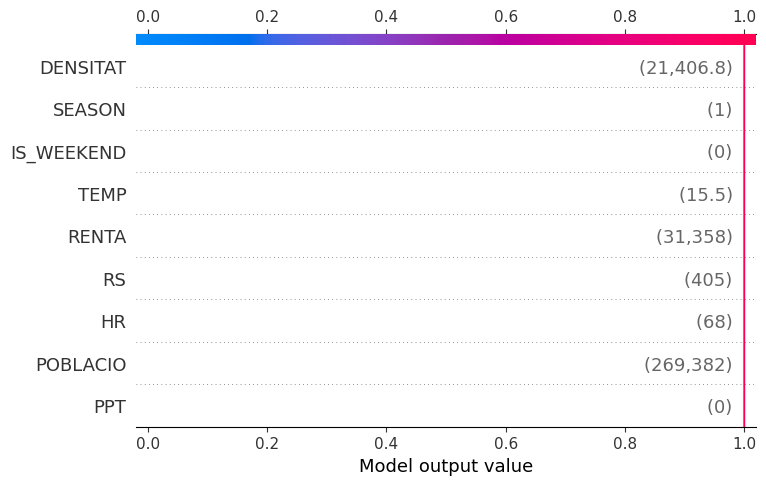

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values[0].values, X.iloc[0], link = 'logit')

## Violin Plot

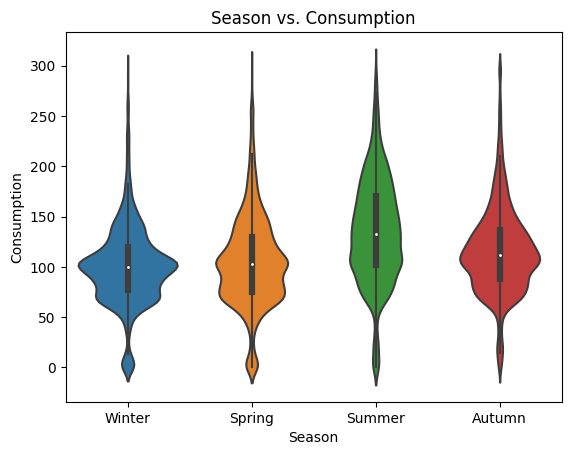

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the season names
season_names = ['Winter', 'Spring', 'Summer', 'Autumn']

# Create the violin plot
sns.violinplot(x=data['SEASON'], y=data['CONSUM'])
plt.xlabel('Season')
plt.ylabel('Consumption')
plt.title('Season vs. Consumption')

# Set the x-axis tick labels
plt.xticks(ticks=[0, 1, 2, 3], labels=season_names)

plt.show()
